# Time Series Analysis 

# 4.2.2 Understanding the dataset

In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data_dir = os.path.join('UCI HAR Dataset', 'UCI HAR Dataset', 'train', 'X_train.txt')
subject = os.path.join('UCI HAR Dataset', 'UCI HAR Dataset', 'train', 'subject_train.txt')
activity = os.path.join('UCI HAR Dataset', 'UCI HAR Dataset', 'train', 'y_train.txt')
feature_names = os.path.join('UCI HAR Dataset', 'UCI HAR Dataset', 'features.txt')

In [3]:
features = []

with open(feature_names) as f:
    for feature in f.readlines():
        # remove \n and running identifier
        t = feature.rstrip().split()[1]
        features.append(t)


In [4]:
train = pd.read_csv(data_dir, sep=' ', skipinitialspace=True, names=features)

labels = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
classes = []
with open(activity) as f:
    classes = [int(l.rstrip()) for l in f.readlines()]
train['classes'] = classes
train['Activity'] = train['classes'].apply(lambda c: labels[c])

C:\Users\mohit\Miniconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",classes,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5,STANDING


### 4. 1 a
Describe the dataset by printing the summary statistics for the columns (i.e., all the input features)?
Typical examples include count, mean, std, min, max, upper and lower percentiles.

**ANSWER**

In [6]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",classes
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,6.000000


### 4.1. b
Plot the number of datapoints for each user activity (i.e., output class) as a histogram. Report if the
data set balanced or not. 

**ANSWER: ** The dataset is slightly unbalanced, with fewer values for walking downstairs, upstairs, and walking. 

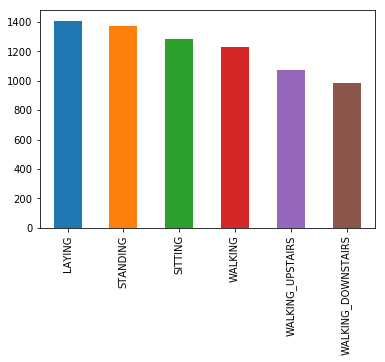

In [7]:
train.Activity.value_counts().plot.bar()

### 4.1. c

Plot some of the derived features (atleast 10) and compare it for different user activities (i.e., output
class). Report whether it is possible to discriminate between activities based on those chosen de-
rived features. Visually inspect and report the nature of distributions (e.g., normal distribution or not,
skewness, modality, etc.) for atleast 10 derived features.

In [8]:
# generate 10 random columns to examine 
np.random.seed(1) #same results every time 

rand_cols = [np.random.randint(0, train.shape[1]) for x in range(10)]
examine_cols = train.columns[rand_cols]

for x in examine_cols: 
    print (x) 

tBodyAcc-correlation()-X,Y
tBodyAccJerkMag-arCoeff()1
tGravityAcc-arCoeff()-Y,4
tBodyGyro-entropy()-Z
tBodyGyro-max()-X
fBodyAccMag-energy()
fBodyAccJerk-bandsEnergy()-17,32
fBodyAcc-energy()-X
tBodyGyroJerk-energy()-Z
fBodyAcc-max()-Z


**ANSWER**

tBodyAcc-correlation()-X,Y

1. normal distribution - Some of the labels 
2. skewness - Some skewed left
3. modality - unimodal 

tBodyAccJerkMag-arCoeff()1

1. normal distribution - All of the labels 
2. skewness - No skew
3. modality - unimodal 
 
tGravityAcc-arCoeff()-Y,4

1. normal distribution - Some of the labels 
2. skewness - Some skewed right 
3. modality - unimodal 

tBodyGyro-entropy()-Z

1. normal distribution - All of the labels 
2. skewness - No skew
3. modality - unimodal 

tBodyGyro-max()-X

1. normal distribution - Some of the labels 
2. skewness - Some skewed left
3. modality - unimodal 

fBodyAccMag-energy()

1. normal distribution - All of the labels
2. skewness - some skewed left 
3. modality - unimodal 

fBodyAccJerk-bandsEnergy()-17,32

1. normal distribution - All of the labels
2. skewness - no skew
3. modality - unimodal 

fBodyAcc-energy()-X

1. normal distribution - All of the labels
2. skewness - no skew
3. modality - unimodal 

tBodyGyroJerk-energy()-Z

1. normal distribution - All of the labels 
2. skewness - no skew
3. modality - unimodal 

fBodyAcc-max()-Z


1. normal distribution - Some of the labels 
2. skewness - some skewed left 
3. modality - unimodal 


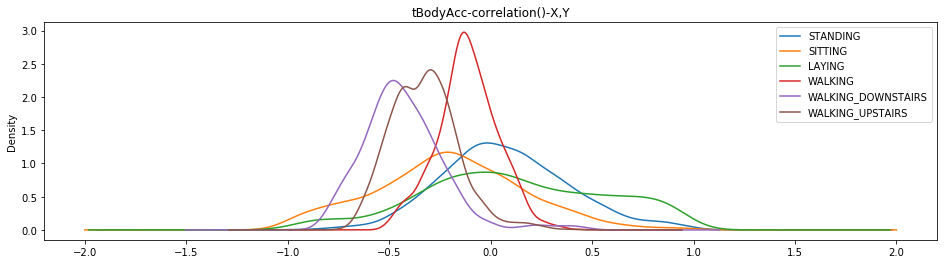

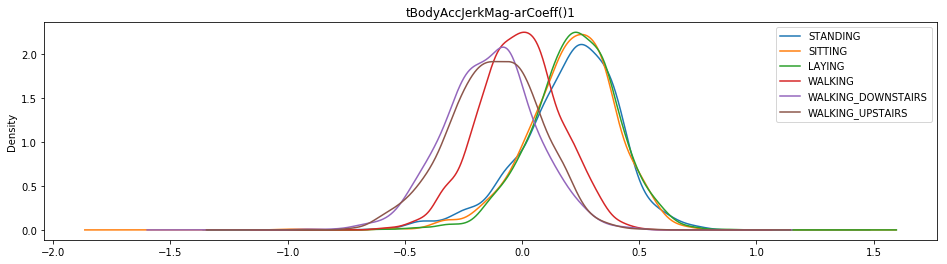

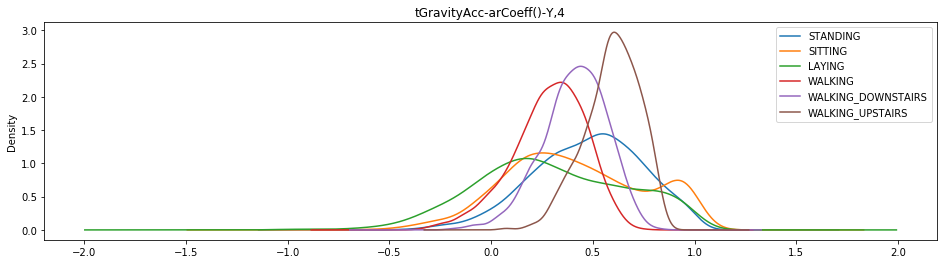

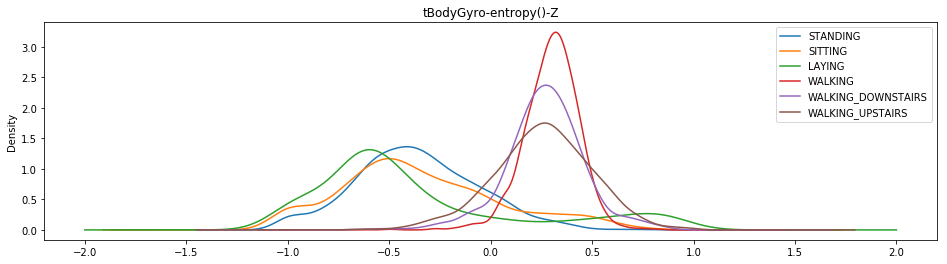

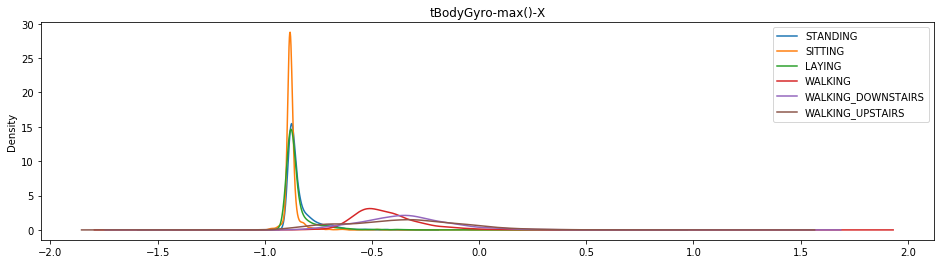

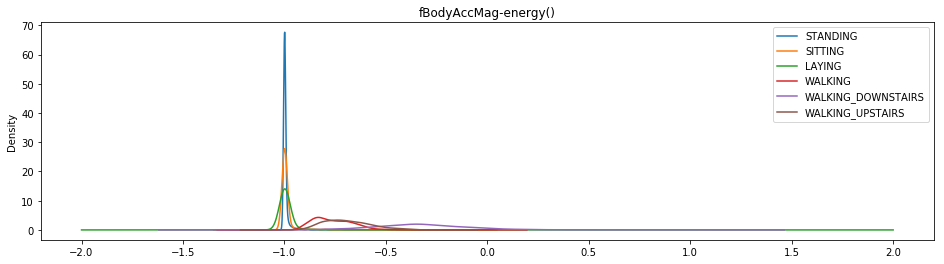

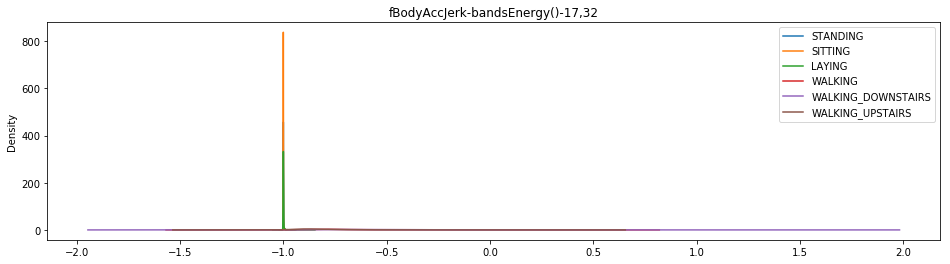

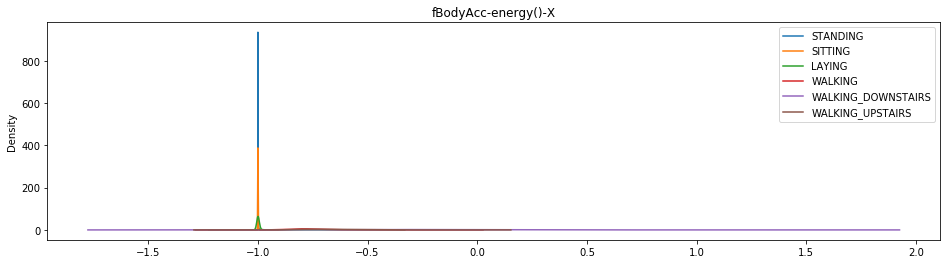

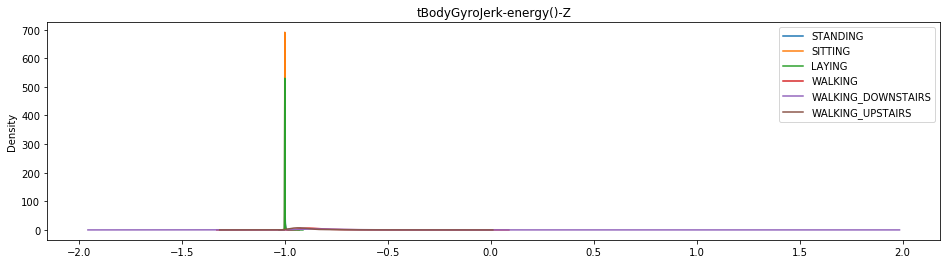

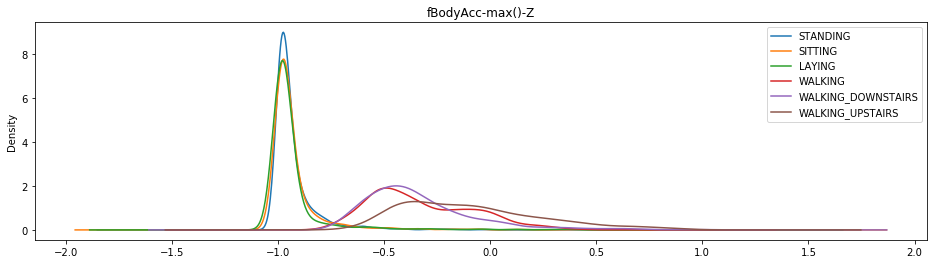

In [9]:
for feature in examine_cols: 
    plt.figure(figsize=(16, 4))

    for a in train.Activity.unique(): 
        train[feature][train.Activity==a].plot('kde', label=a)

    plt.title(feature)
    plt.legend()
    plt.show()

In [10]:
# read in the raw data 

raw_AX_dir = os.path.join('UCI HAR Dataset', 'UCI HAR Dataset', 'train','Inertial Signals' , 'body_acc_x_train.txt')
raw_AY_dir = os.path.join('UCI HAR Dataset', 'UCI HAR Dataset', 'train','Inertial Signals' , 'body_acc_y_train.txt')
raw_AZ_dir = os.path.join('UCI HAR Dataset', 'UCI HAR Dataset', 'train','Inertial Signals' , 'body_acc_z_train.txt')

raw_AX = pd.read_csv(raw_AX_dir, sep=' ', skipinitialspace=True, names=range(128))
raw_AY = pd.read_csv(raw_AY_dir, sep=' ', skipinitialspace=True, names=range(128))
raw_AZ = pd.read_csv(raw_AZ_dir, sep=' ', skipinitialspace=True, names=range(128))

accel_data = [raw_AX, raw_AY, raw_AZ]

# 4.2.3 Preprocessing and time-domain features

### 4.2 a Peak Detection

Step detection is the most common output of the ubiquitous activity recognition apps and wearable
devices. Although many sophisticated algorithms exist, the basic concept in all those methods is to
find the peaks and count them.
Apply different peak finding methods described in the link below on the accelerometer data. You can
choose to focus on just one axis which has the highest variations in acceleration. Report your views
on their effectiveness and which one is favorable for this dataset.
https://github.com/MonsieurV/py-findpeaks#detect_peaks-from-marcos-duarte
You
will find the documention and sample code of each peak detection algorithm by clicking on the link
under each graph (in the above github page).

In [11]:
import scipy.signal
import peakutils.peak

class PeakDectection(): 
    '''Peak Detection Class for easy utility'''
    def __init__(self, vector): 
        self.vector = vector
        
    def no_filter(self): 
        '''Detect peaks without any filters.'''
        indexes = scipy.signal.find_peaks_cwt(self.vector,
                                              np.arange(1, 4),max_distances=np.arange(1, 4)*2)
        indexes = np.array(indexes) - 1
        return indexes 

    def distance(self): 
        '''Detect peaks with order (distance) filter.'''
        indexes = scipy.signal.argrelextrema(np.array(self.vector),
                                             comparator=np.greater,order=2)
        return indexes[0]

    def min_height(self):     
        '''Detect peaks with minimum height and distance filters'''
        indexes = peakutils.peak.indexes(np.array(self.vector))
        return indexes

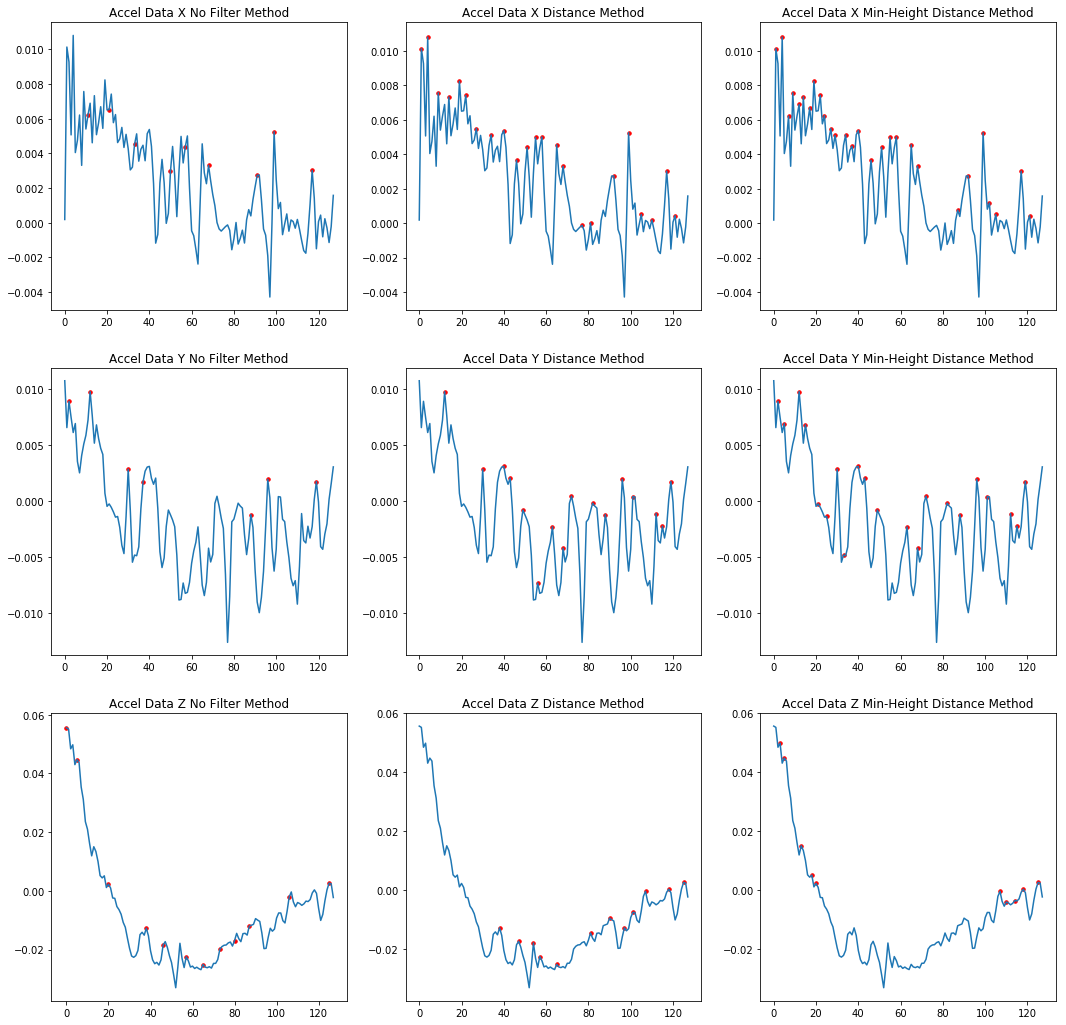

In [12]:
accel_data = [raw_AX, raw_AY, raw_AZ]
names = ['X', 'Y', 'Z']

plt.figure(figsize=(18, 18))

for i in range(3): 

    data = accel_data[i].iloc[0]
    Detector = PeakDectection(data.values)
    
    dist_indices = Detector.no_filter()
    plt.subplot(3, 3, i*3 + 1)
    plt.title('Accel Data {} No Filter Method'.format(names[i]))
    data.plot()
    plt.scatter(x = dist_indices, y = data[dist_indices], c='r', s = 12)

    dist_indices = Detector.distance()
    plt.subplot(3, 3, i*3 + 2)
    plt.title('Accel Data {} Distance Method'.format(names[i]))
    data.plot()
    plt.scatter(x = dist_indices, y = data[dist_indices], c='r', s = 12)

    dist_indices = Detector.min_height()
    plt.subplot(3, 3, i*3 + 3)
    plt.title('Accel Data {} Min-Height Distance Method'.format(names[i]))
    data.plot()
    plt.scatter(x = dist_indices, y = data[dist_indices], c='r', s = 12)


plt.show()
    

### 4.2 a Peak Detection 

**ANSWER** 

For all analyses, negative values were ignored, so this needs to be adjusted for all the algorithms. Despute this, the no-filter method performed poorly and missed or inaccuractely identified several taller peaks. Distance and Min-height distance performed similarly for all accerometer axes. 

### 4.2 b Bandpass Filtering 

Apply a low-pass and high-pass band filter to the raw data. You can choose to focus on just one axis
which has the highest variations in acceleration. Report which of the filters is better for our data set
and task

**ANSWER** Low pass is better, since we want to retain lower frequency signals and movement, and ignore the higher frequency noise from sensor noise or mains voltage. 

In [13]:
from scipy.signal import butter, lfilter, freqz

def butter_filter(data, cutoff, fs, type_, tyorder=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    
    b, a = butter(order, normal_cutoff, btype=type_, analog=False)
    y = lfilter(b, a, data)
    return y


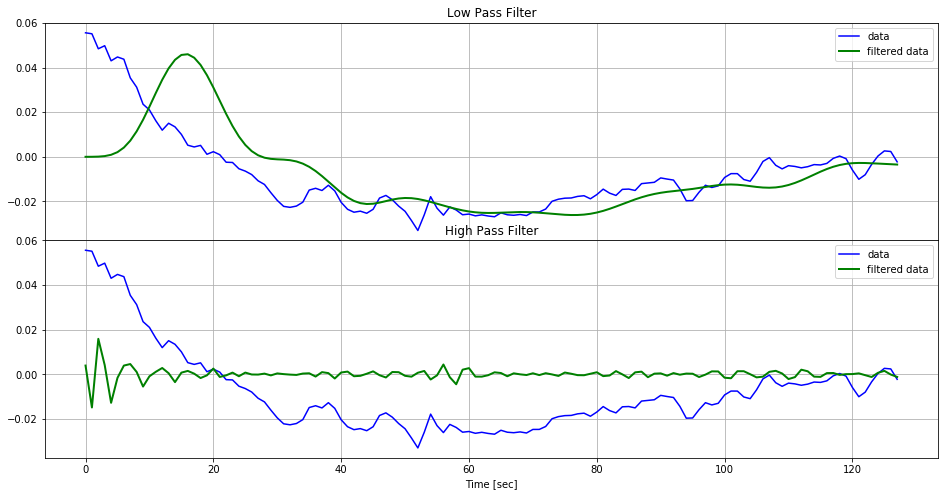

In [14]:
# Filter requirements.
order = 6
fs = 50.0       # sample rate, Hz
cutoff_low = 3     # desired cutoff frequency of the filter, Hz
cutoff_high = 10

# run the filters 
y_low = butter_filter(data.values, cutoff_low, fs, 'low', order)
y_high = butter_filter(data.values, cutoff_high, fs, 'high', order)

#### PLOT ##### 
plt.figure(figsize=(16, 8))
t = range(data.shape[0])

plt.subplot(2, 1, 1)
plt.title('Low Pass Filter')
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y_low, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()


plt.subplot(2, 1, 2)
plt.title('High Pass Filter')
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y_high, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()


plt.subplots_adjust(hspace=0)
plt.show()

### 4.2.3 c) 

Write code to recreate some of those time-domain features features such as mean, standard deviation,
kurtosis and signal magnitude area from the raw data. Report (by visual investigation) whether some
of the features (e.g., SMA) have the potential to discriminate between multiple activities

**ANSWER** Below I perform the required steps. Based on the Probablity Density Charts, it is possible to discrimate the walking vs. sendentary subclasses, but not specific classes from these processed features. 

In [15]:
'''
mean(): Mean value
std(): Standard deviation
mad(): Median absolute deviation 
max(): Largest value in array
min(): Smallest value in array
'''

#create an empty dataframe with the same features we want to compute 
derive_features = train.iloc[:, :15]
derive_features[:] = 0.0
derive_features.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# for scaling all values to between -1, 1 - like the original dataset 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))

In [17]:
for i, dim in enumerate(['X', 'Y', 'Z']): 
    features = [x for x in derive_features.columns if dim in x]
    
    derive_features[features[0]] = pd.Series(scaler.fit_transform(accel_data[i].mean(axis=1).values.reshape(-1, 1)).flatten())
    derive_features[features[1]] = pd.Series(scaler.fit_transform(accel_data[i].std(axis=1).values.reshape(-1, 1)).flatten())
    derive_features[features[2]] = pd.Series(scaler.fit_transform(accel_data[i].mad(axis=1).values.reshape(-1, 1)).flatten())
    derive_features[features[3]] = pd.Series(scaler.fit_transform(accel_data[i].max(axis=1).values.reshape(-1, 1)).flatten())
    derive_features[features[4]] = pd.Series(scaler.fit_transform(accel_data[i].min(axis=1).values.reshape(-1, 1)).flatten())
derive_features.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z
0,0.288585,-0.020294,-0.132905,-0.995279,-0.982504,-0.913526,-0.995112,-0.982908,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263
1,0.278419,-0.016411,-0.123520,-0.998245,-0.974351,-0.960322,-0.998807,-0.974502,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637
2,0.279653,-0.019467,-0.113462,-0.995380,-0.965883,-0.978944,-0.996520,-0.963071,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344
3,0.279174,-0.026201,-0.123283,-0.996091,-0.982809,-0.990675,-0.997099,-0.982466,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,0.682401,0.837869
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980110,-0.990482,-0.998321,-0.979338,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,0.683250,0.837869


In [18]:
# now assert that the two matrices are nearly identical 

np.allclose(derive_features.values, train.iloc[:, :15].values, rtol = 1e-5, atol=1e-1)

True

In [19]:
# add in the labels 

derive_features = pd.concat([derive_features, train.iloc[:, -2:]], axis=1)

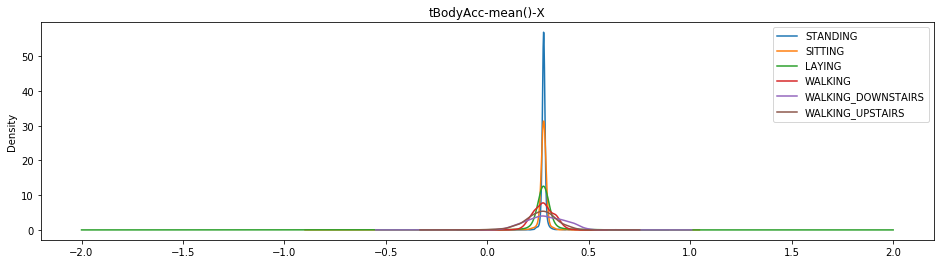

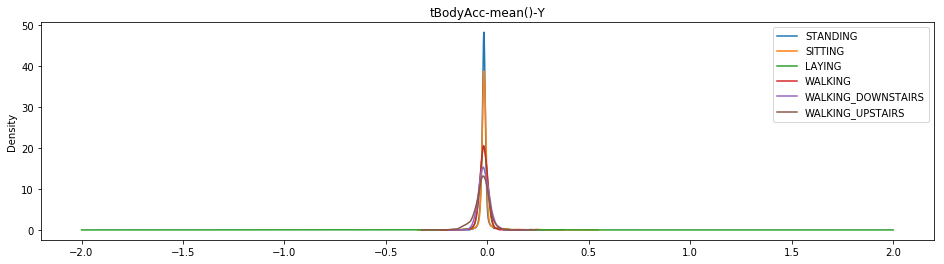

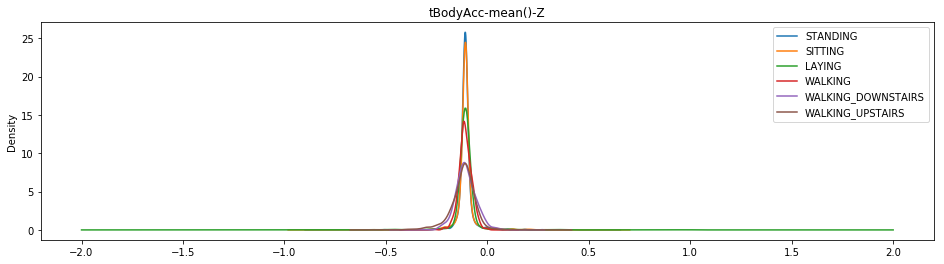

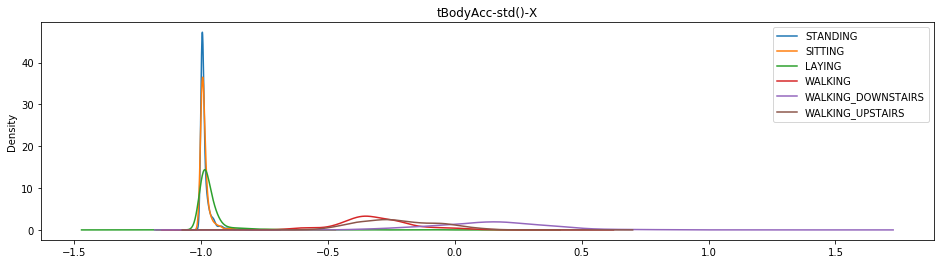

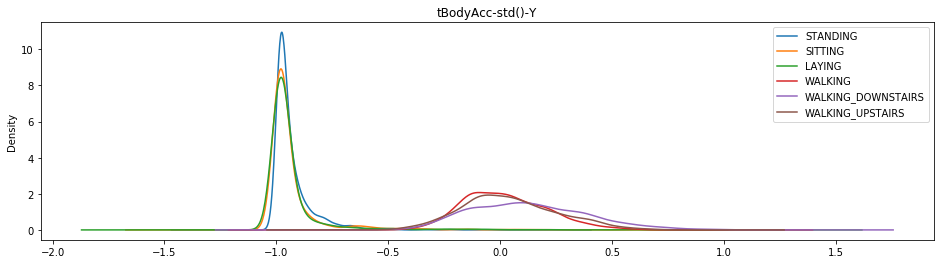

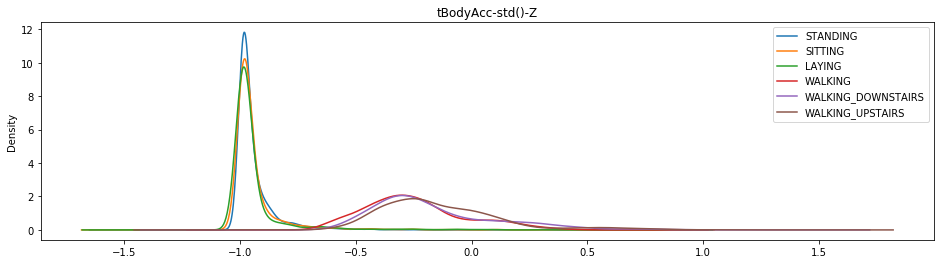

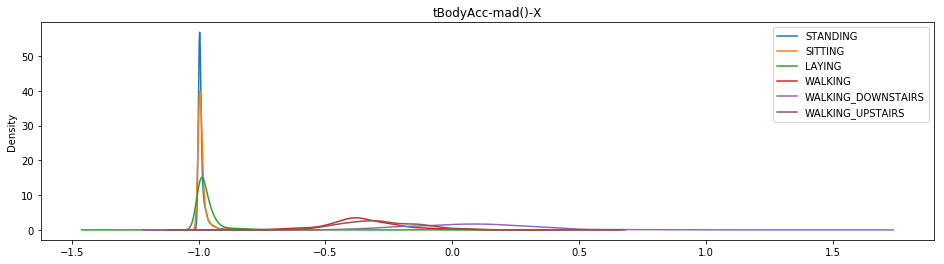

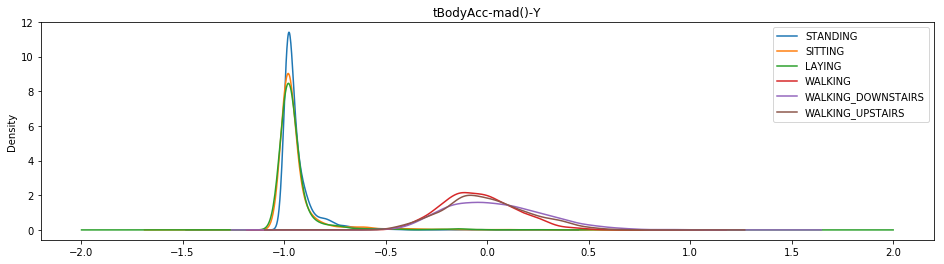

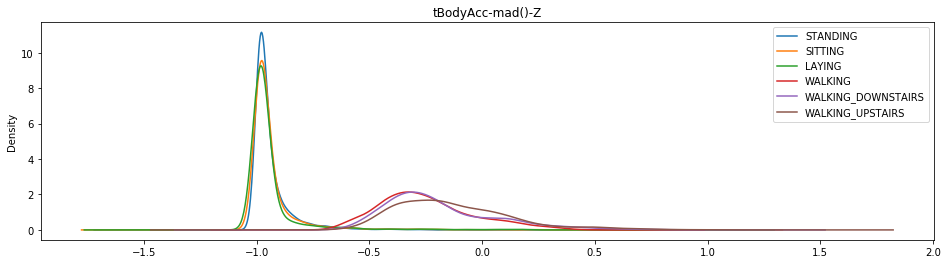

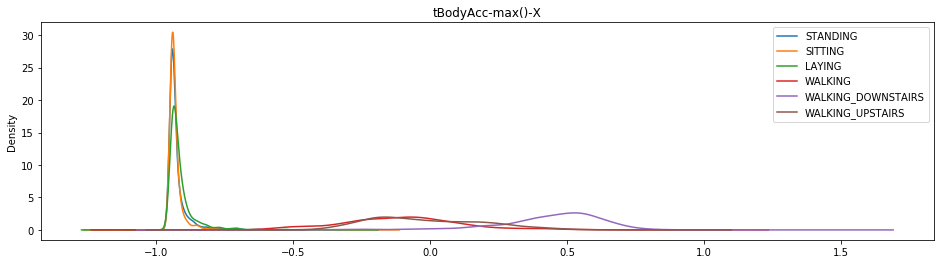

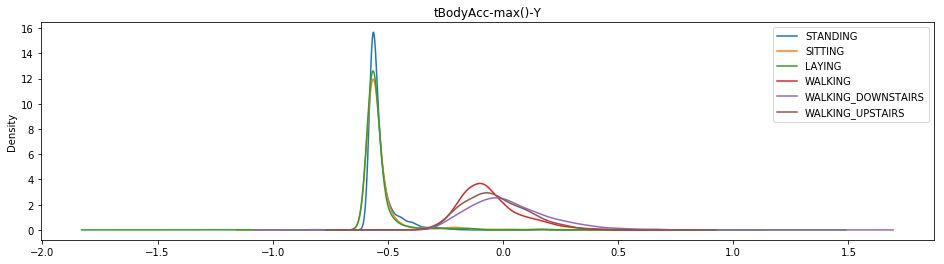

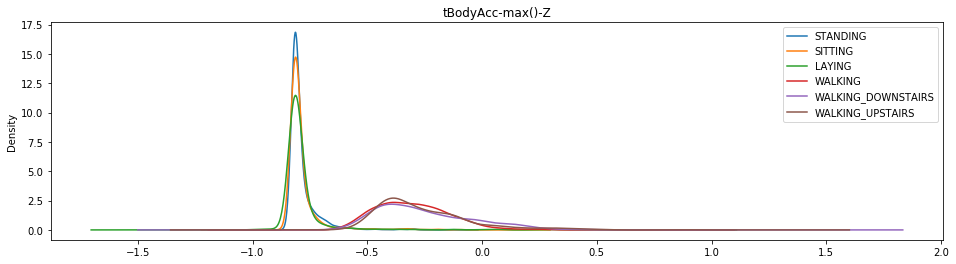

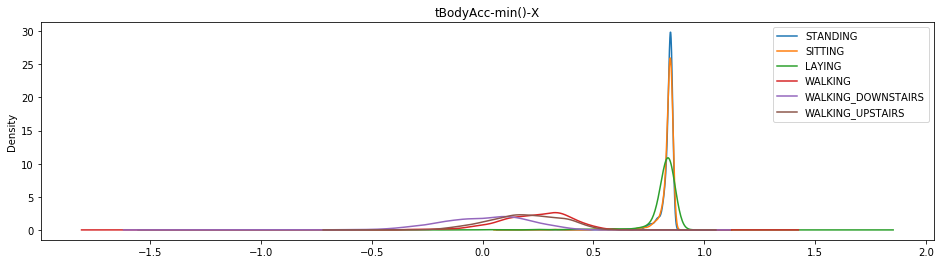

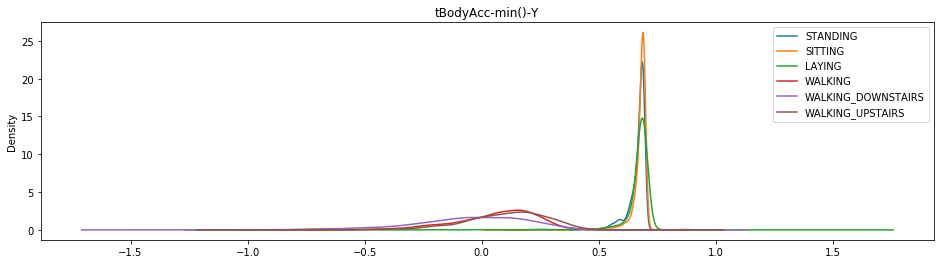

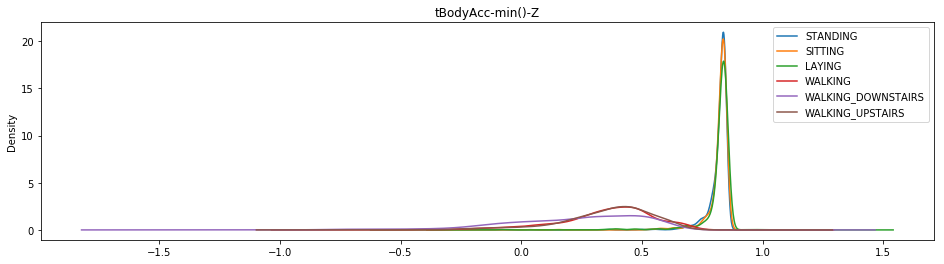

In [20]:

for feature in derive_features.columns[:-2]: 
    plt.figure(figsize=(16, 4))

    for a in derive_features.Activity.unique(): 
        derive_features[feature][derive_features.Activity==a].plot('kde', label=a)

    plt.title(feature)
    plt.legend()
    plt.show()

## 4.2.4  Frequency domain features

Fourier transform of a time signal helps us to understand the component frequencies present in that
signal. A seemingly noisy signal in time domain can show useful patterns (dominating frequencies)
in the frequency domain.
Apply FFT on the raw data and visualize the proportions of component frequencies under the following
conditions,

    (a) Before and after using any filters for pre-processing.
    (b) For a short sequence of walking and being idle.

Also, report whether the FFT coefficients are useful to (visually) discriminate the individual activities.


In [21]:
from scipy.fftpack import fft

In [22]:
# the low/high pass filter from the above problem 
def butter_filter(data, cutoff, fs, type_, tyorder=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    
    b, a = butter(order, normal_cutoff, btype=type_, analog=False)
    y = lfilter(b, a, data)
    return y


def FFT_plot(y, num_points=1000000): 
    # Number of sample points
    N = np.minimum(num_points, train.iloc[:, _id].shape[0])

    # 1 / sample frequency  hz
    T = 1.0 / 30.0

    # prep perform FFT
    yf = fft(y)

    # prep for plotting 
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)[1:]
    yf_plot = 2.0/N * np.abs(yf[0:N//2])[1:]
    
    return xf, yf_plot

In [23]:
# Filter requirements.
order = 6
fs = 50.0       # sample rate, Hz
cutoff_low = 5     # desired cutoff frequency of the filter, Hz
cutoff_high = 5

_id = 0
num_points = 200

# run the filters 
data = accel_data[2].iloc[100, :]
t, y_unfiltered = FFT_plot(data, num_points)
y_low = FFT_plot(butter_filter(data.values, cutoff_low, fs, 'low', order), num_points)[1]
y_high = FFT_plot(butter_filter(data.values, cutoff_high, fs, 'high', order), num_points)[1]

FFT plots before and after using any filters for pre-processing for 100.


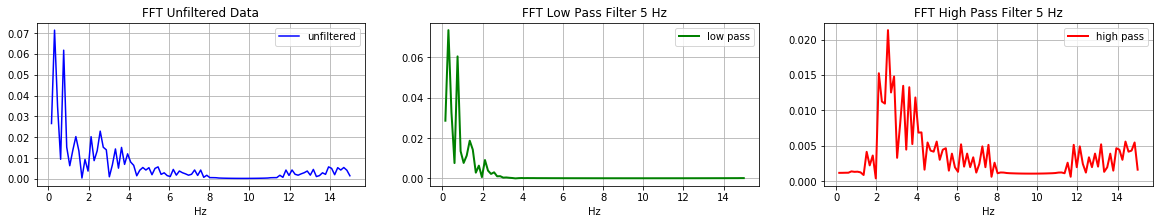

In [24]:

#### PLOT ##### 
plt.figure(figsize=(20, 3))

plt.subplot(1, 3, 1)
plt.title('FFT Unfiltered Data')
plt.plot(t, y_unfiltered, 'b-', label='unfiltered')
plt.xlabel('Hz')
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.title('FFT Low Pass Filter {} Hz'.format(cutoff_low))
plt.plot(t, y_low, 'g-', linewidth=2, label='low pass')
plt.xlabel('Hz')
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.title('FFT High Pass Filter {} Hz'.format(cutoff_high))
plt.plot(t, y_high, 'r-', linewidth=2, label='high pass')
plt.xlabel('Hz')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0)
print ('FFT plots before and after using any filters for pre-processing for {}.'.format(data.name))
plt.show()

In [25]:
# signals for standing 
stand_index = train[train.Activity == 'STANDING'].index

# signals for walking 
walk_index = train[train.Activity == 'WALKING'].index

In [26]:
# run the filters 
data_stand = accel_data[0].iloc[stand_index[0], :]
t, y_stand = FFT_plot(data_stand, num_points)

data_walk = accel_data[0].iloc[walk_index[0], :]
t, y_walk = FFT_plot(data_walk, num_points)


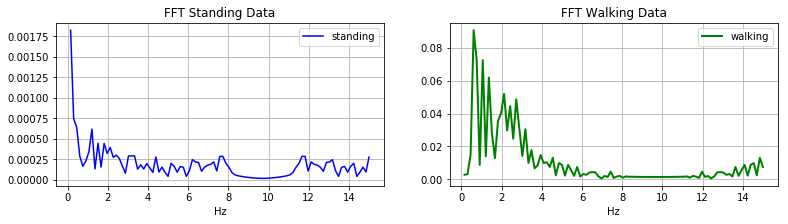

In [27]:
#### PLOT ##### 
plt.figure(figsize=(20, 3))

plt.subplot(1, 3, 1)
plt.title('FFT Standing Data')
plt.plot(t, y_stand, 'b-', label='standing')
plt.xlabel('Hz')
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.title('FFT Walking Data')
plt.plot(t, y_walk, 'g-', linewidth=2, label='walking')
plt.xlabel('Hz')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0)
plt.show()

**ANSWER** Yes. The FFT plots are useful for visually discriminating the activities. Specifically, we see a ~2Hz peak in the low-pass data, which corresponds to non-stationary activities. 

# 4.2.5 Time series matching and classification

## 4.4 a) 

Apply the same technique on raw data (pre-processed with filters) and compare it with the results based on the derived features. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier as KNN
import dtwco

def dtw_metric(x, y):
    """
    Custom metric for kNN that uses DTW.
    """
    return dtwco.dtw(x, y)

In [29]:
offset = 1
skip_vals = 50

Derived Features

In [30]:
X_train_derived = train.iloc[:, :-2]
y_labels = train.iloc[:, -1].values

m = KNN(n_neighbors=1, metric=dtw_metric)
m.fit(X_train_derived[::skip_vals], y_labels[::skip_vals]);
label_derived = m.predict(X_train_derived[offset::skip_vals])

Raw Data

In [31]:
raw_X = accel_data[0].values

m = KNN(n_neighbors=1, metric=dtw_metric)
m.fit(raw_X[::skip_vals], y_labels[::skip_vals]);
label_raw = m.predict(raw_X[offset::skip_vals])

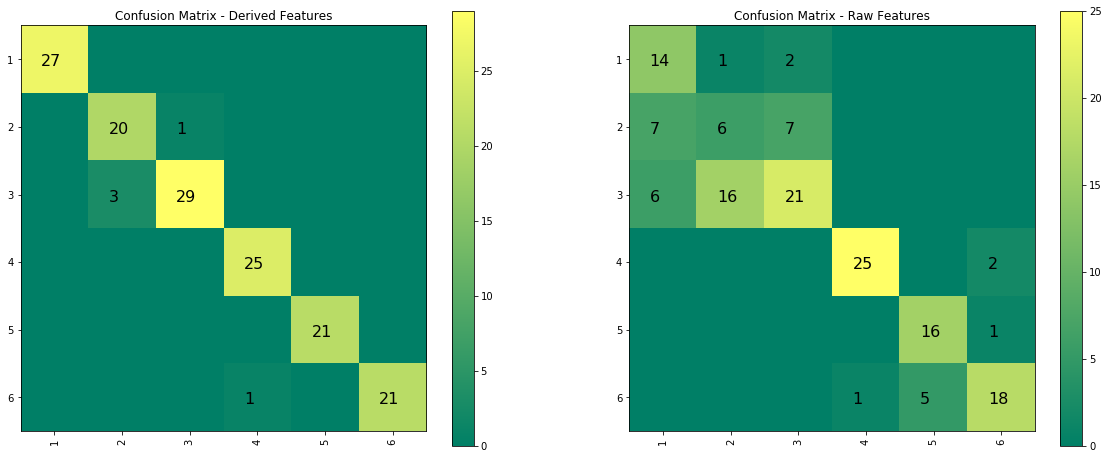

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
# print (classification_report(label, y_labels[offset::skip_vals],
#                             target_names=[l for l in labels]))

fig = plt.figure(figsize=(20,8))

# DERIVED FEATURES
plt.subplot(1, 2, 1)
conf_mat = confusion_matrix(label_derived, y_labels[offset::skip_vals])

width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c>0:
            plt.text(j-.2, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix - Derived Features')
_ = plt.xticks(range(6), [l for l in labels], rotation=90)
_ = plt.yticks(range(6), [l for l in labels])

#RAW DATA 
plt.subplot(1, 2, 2)
conf_mat = confusion_matrix(label_raw, y_labels[offset::skip_vals])

width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c>0:
            plt.text(j-.2, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix - Raw Features')
_ = plt.xticks(range(6), [l for l in labels], rotation=90)
_ = plt.yticks(range(6), [l for l in labels])



**ANSWER** The derived features provide better results, as shown in the confusion matrices. However, both classifiers produce positive results when discriminating between ambulatory and non-abulatory activities. This is seen as the two clusters in the Raw-Features confusion matrix. It should be noted that both classifiers were trained on a subset of the data (2%) because the training time was quite large (O(N^2) time complexity for the DTW algorithm). 

## 4.4 b) 

Plot the yearly temperature for the following countries: Norway, Finland, Singapore and Cambodia.
Use DTW to measure the similarities between the temperature data of these countries and reflect on
the results.

In [33]:
temp_dir = os.path.join('temp_data', 'GlobalLandTemperaturesByCountry.csv')
temperatures = pd.read_csv(temp_dir)

temperatures.dropna(inplace=True)
temperatures.index = pd.DatetimeIndex(temperatures.dt)

In [34]:
countries = ['Norway', 'Finland', 'Singapore', 'Cambodia']

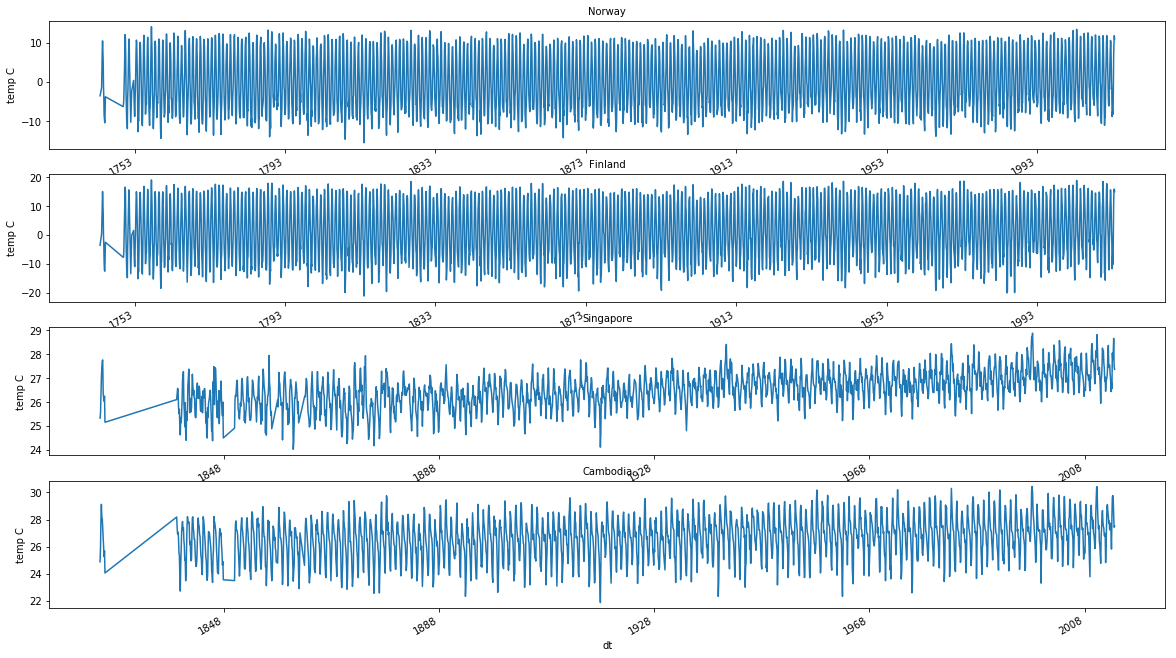

In [35]:
plt.figure(figsize=(20, 12))
for i in range(len(countries)): 
    plt.subplot(4, 1, i+1)
    plt.title(countries[i], size=10)
    plt.xlabel('year')
    plt.ylabel('temp C')
    temp = temperatures[temperatures.Country == countries[i]]['AverageTemperature']
    temp.plot()
plt.show()

In [36]:
#get N choose 2 cobinations of all countries 

import itertools
country_combos = list(itertools.combinations(countries, 2))
len(country_combos)

6

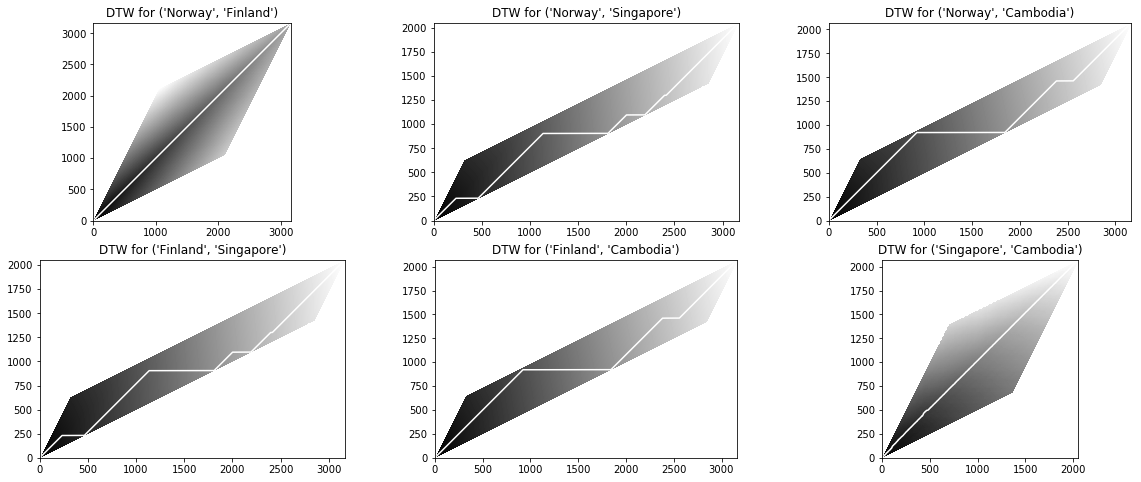

In [37]:
plt.figure(figsize=(20, 8))
for i, c in enumerate(country_combos): 

    x = temperatures[temperatures.Country == c[0]]['AverageTemperature']
    y = temperatures[temperatures.Country == c[1]]['AverageTemperature']
    dist, cost, path = dtwco.dtw(x, y, constraint='itakura', dist_only=False)
    
    plt.subplot(2, 3, i+1)
    plt.title('DTW for {}'.format(c))
    
    plot1 = plt.imshow(cost.T, origin='lower', cmap='gray', interpolation='nearest')
    plot2 = plt.plot(path[0], path[1], 'w')
    
plt.show()

**ANSWER** It is evident from the plots that countries with similar geographic region share a similar DTW path lenth. For example, the Norway-Finland chart and the Singapore-Cambodia chart both have linear paths with equally spaced diamonds on the residual sides of the path. Thsi means that their time-series properties are aligned. Meanwhile, other charts do not exhbit this nice linear property, and they also are not geographically close country pairs. 

# 4.2.6 Curve fitting and prediction

## 4.5 

In [38]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20, 3))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\mohit\Miniconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**ANWER** Basic rolling mean and std: this is not super helpful because we cannot easily see and extract the periodicty of the data. We can just focus on the rolling mean alone, below. 

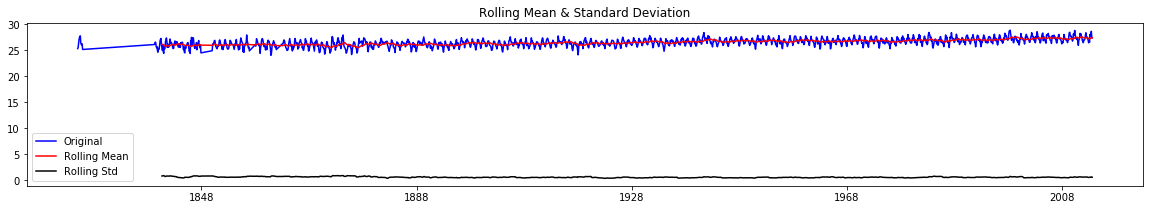

Results of Dickey-Fuller Test:
Test Statistic                   -2.995178
p-value                           0.035347
#Lags Used                       25.000000
Number of Observations Used    2026.000000
Critical Value (1%)              -3.433582
Critical Value (5%)              -2.862968
Critical Value (10%)             -2.567530
dtype: float64


In [39]:
test_stationarity(x)

A Rolling Mean higlights the upward trend. 

C:\Users\mohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


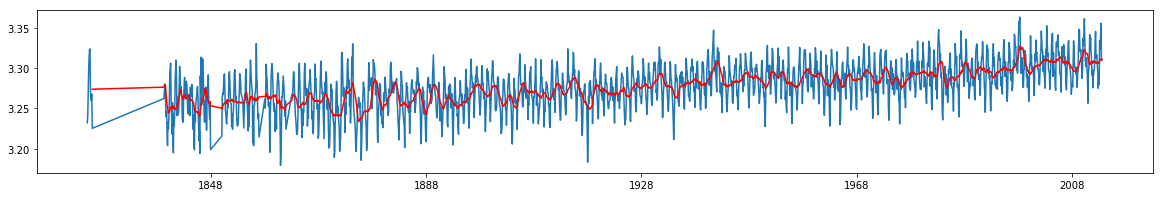

In [40]:
plt.figure(figsize=(20, 3))
ts_log = np.log(x)
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

**ANSWER** We know that data points are taken roughly on the first of every month, this means the frequency is 12. We can plug this into the seasonal decomposition function to extract any underlying trends. 

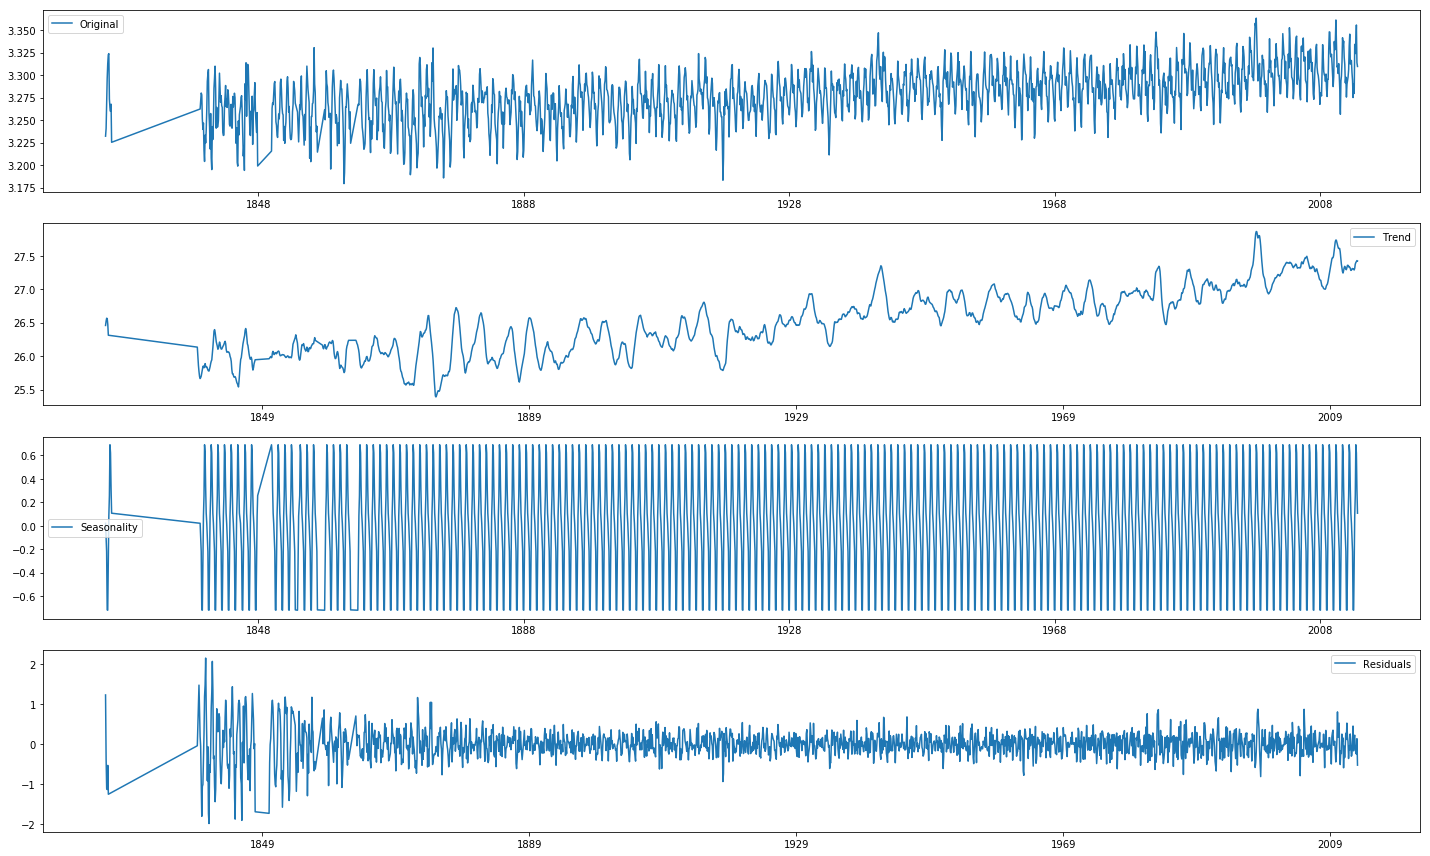

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x, freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20, 12))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



**ANSWER ** Seasonal Differencing seems to be the best trend extractor, as we can clearly see the monthly (frequency=12) peridocity. The trendline also highlights the upward movement as it is normalized to arange of about [3-4].

## 4.5 b) 

Repeat the DTW assignment from the previous question on this data set on the de-trended data and
reflect on the results.

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose(x): 
    decomposition = seasonal_decompose(x, freq=12)
    trend = decomposition.trend
    return trend

C:\Users\mohit\Miniconda3\lib\site-packages\matplotlib\colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\mohit\Miniconda3\lib\site-packages\numpy\ma\core.py:2778: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


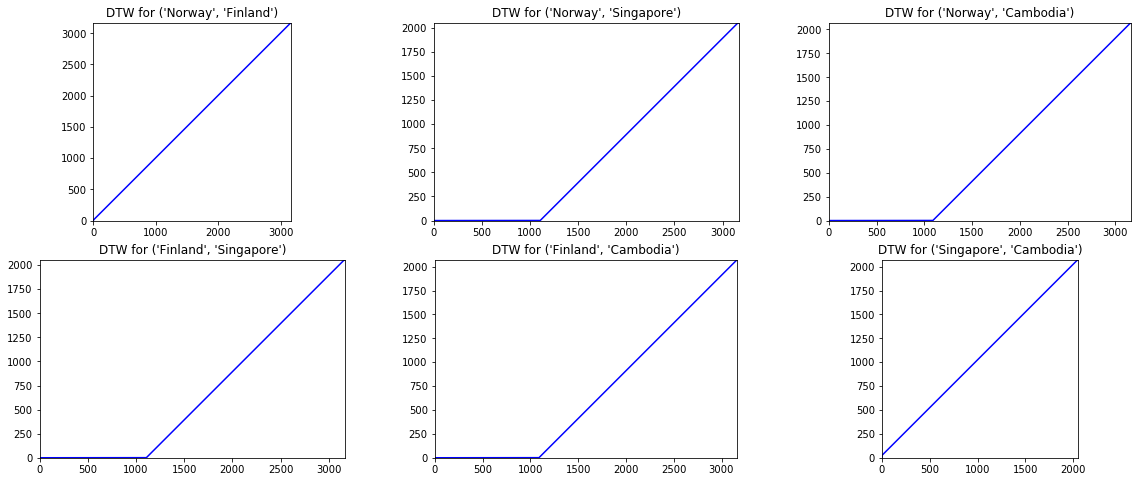

In [43]:
plt.figure(figsize=(20, 8))
for i, c in enumerate(country_combos): 

    x = decompose(temperatures[temperatures.Country == c[0]]['AverageTemperature'])
    y = decompose(temperatures[temperatures.Country == c[1]]['AverageTemperature'])
    dist, cost, path = dtwco.dtw(x, y, constraint='itakura', dist_only=False)
    
    plt.subplot(2, 3, i+1)
    plt.title('DTW for {}'.format(c))
    
    plot1 = plt.imshow(cost.T, origin='lower', cmap='gray', interpolation='nearest')
    plot2 = plt.plot(path[0], path[1], 'b')
    
plt.show()

**ANSWER**  The trend data shows a different story than the non-trend data. Specifically, all the charts show the linear patterns between the two country-pair path-lengths. The interpretation of this, is that all the country pairs show the same time-series property, which when we look at the actual time series plots, is the upward trend of the temperature across all regions. 